**Importing Nesessary Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l1_l2
from keras.optimizers import Adam

import os
import random
import numpy as np
import matplotlib.pyplot as plt

**Load Cifar10 Training and Test Data**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


**Stroring the Class labels in a List**

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Displaying the First 50 images in the DataSet**

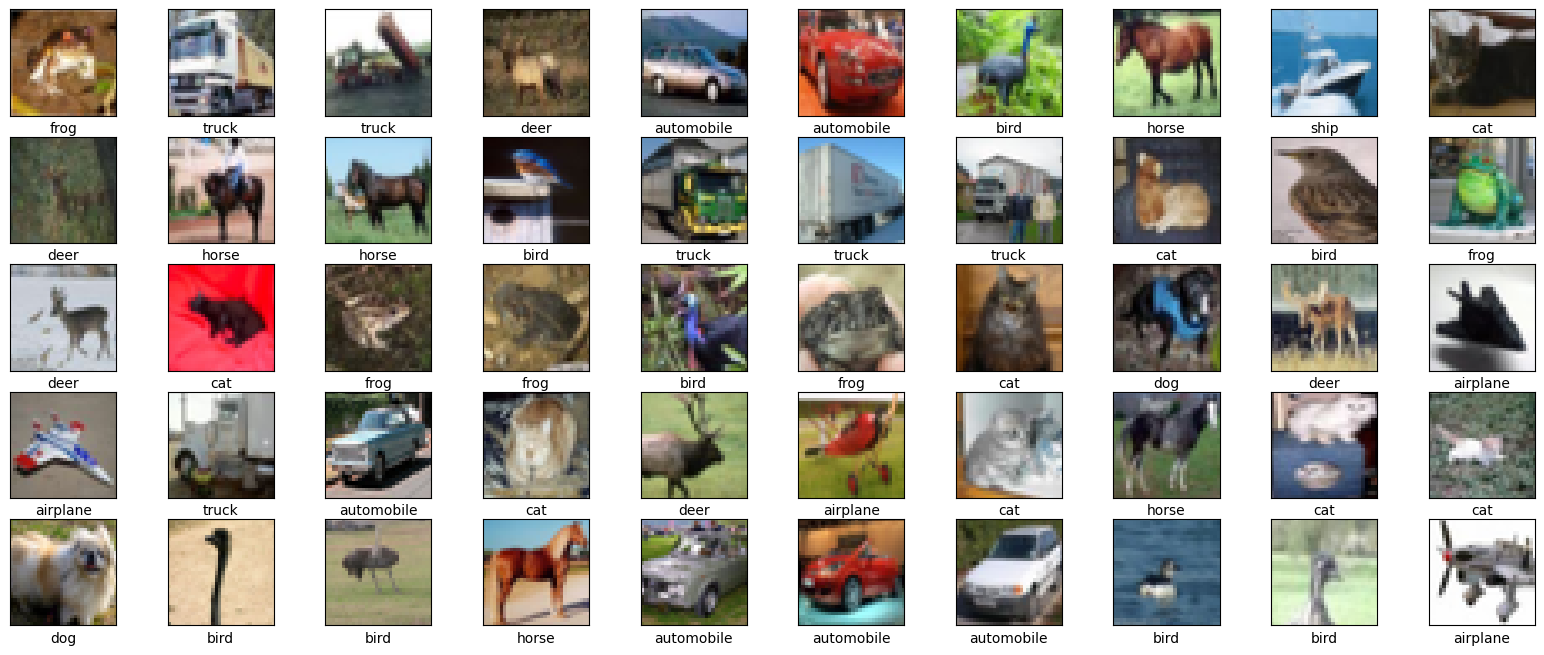

In [ ]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

**Data Preprecessing**

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

**Model Compilation With Adam Optimizer and Without Applying L1 and L2**

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.2, batch_size=64)
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train, y=Y_train,
              epochs=17,
              validation_split=0.2,
              batch_size=64,
              callbacks=[cb]
             )

Epoch 1/17
625/625 [==============================] - 199s 319ms/step - loss: 1.2213 - accuracy: 0.5640 - val_loss: 1.2453 - val_accuracy: 0.5618
Epoch 2/17
625/625 [==============================] - 189s 302ms/step - loss: 1.1980 - accuracy: 0.5753 - val_loss: 1.2302 - val_accuracy: 0.5661
Epoch 3/17
625/625 [==============================] - 199s 318ms/step - loss: 1.1770 - accuracy: 0.5820 - val_loss: 1.2065 - val_accuracy: 0.5748
Epoch 4/17
625/625 [==============================] - 199s 318ms/step - loss: 1.1597 - accuracy: 0.5889 - val_loss: 1.1842 - val_accuracy: 0.5824
Epoch 5/17
625/625 [==============================] - 190s 305ms/step - loss: 1.1427 - accuracy: 0.5956 - val_loss: 1.2148 - val_accuracy: 0.5709
Epoch 6/17
625/625 [==============================] - 199s 318ms/step - loss: 1.1274 - accuracy: 0.6025 - val_loss: 1.1564 - val_accuracy: 0.5953
Epoch 7/17
625/625 [==============================] - 189s 302ms/step - loss: 1.1118 - accuracy: 0.6081 - val_loss: 1.1502 -

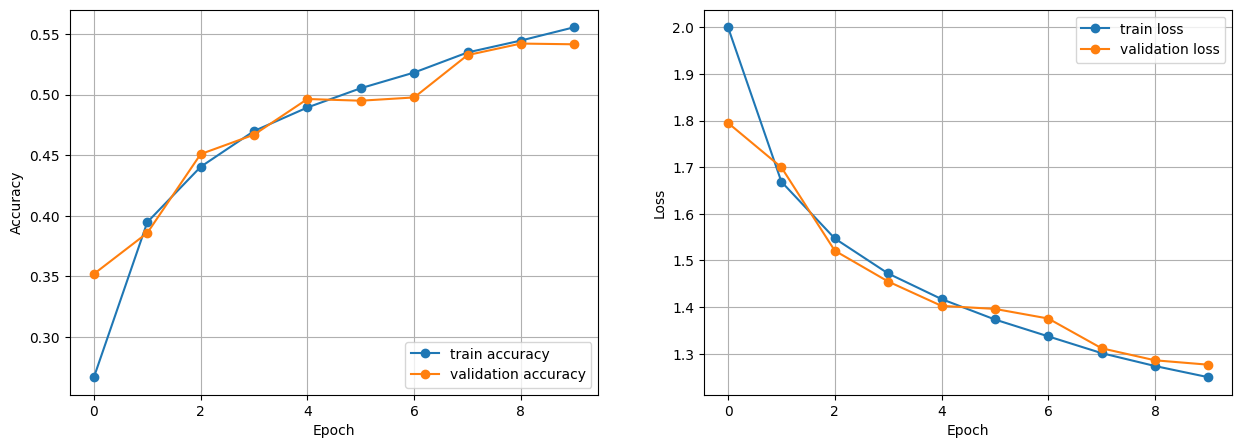

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

By Applying Adam Optimizer without Applying L1 and L2 we have got this Validation and Accuracy Graph and It is the best Graph i have found by testing some approaches and comparing them. And we can see that the Graph shows the Training process is good Enough against the Overfitting. I have tried the Approach without EarlyStopping and i got the overfitting in some point. And when i tried to do the Training Process process with 50 epoch but i got the overfitting in some points. Again When i tried Without applying EarlyStopping i have got the overfitting in the early epoch . So i can say that By Applying EarlyStopping i have the good Result so far.


**Model Compilation With RMSprop Optimizer and Without Applying L1 and L2**

In [ ]:
model2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 32)        

In [ ]:
model2.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001,momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.2, batch_size=64)
early_stopping_cb = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

h = model2.fit(
    x=X_train,
    y=Y_train,
    epochs=20,  # Increase the number of epochs if necessary
    validation_split=0.3,
    batch_size=64,
    callbacks=[early_stopping_cb, reduce_lr_cb]  # Add the ReduceLROnPlateau callback
)


Epoch 1/20
547/547 [==============================] - 87s 157ms/step - loss: 1.7123 - accuracy: 0.3789 - val_loss: 1.6177 - val_accuracy: 0.4186 - lr: 1.0000e-04
Epoch 2/20
547/547 [==============================] - 85s 155ms/step - loss: 1.5049 - accuracy: 0.4546 - val_loss: 1.4791 - val_accuracy: 0.4766 - lr: 1.0000e-04
Epoch 3/20
547/547 [==============================] - 85s 156ms/step - loss: 1.3775 - accuracy: 0.5080 - val_loss: 1.4137 - val_accuracy: 0.4970 - lr: 1.0000e-04
Epoch 4/20
547/547 [==============================] - 85s 155ms/step - loss: 1.2917 - accuracy: 0.5402 - val_loss: 1.3168 - val_accuracy: 0.5325 - lr: 1.0000e-04
Epoch 5/20
547/547 [==============================] - 83s 152ms/step - loss: 1.2130 - accuracy: 0.5690 - val_loss: 1.2146 - val_accuracy: 0.5691 - lr: 1.0000e-04
Epoch 6/20
547/547 [==============================] - 85s 156ms/step - loss: 1.1541 - accuracy: 0.5900 - val_loss: 1.2117 - val_accuracy: 0.5716 - lr: 1.0000e-04
Epoch 7/20
547/547 [========

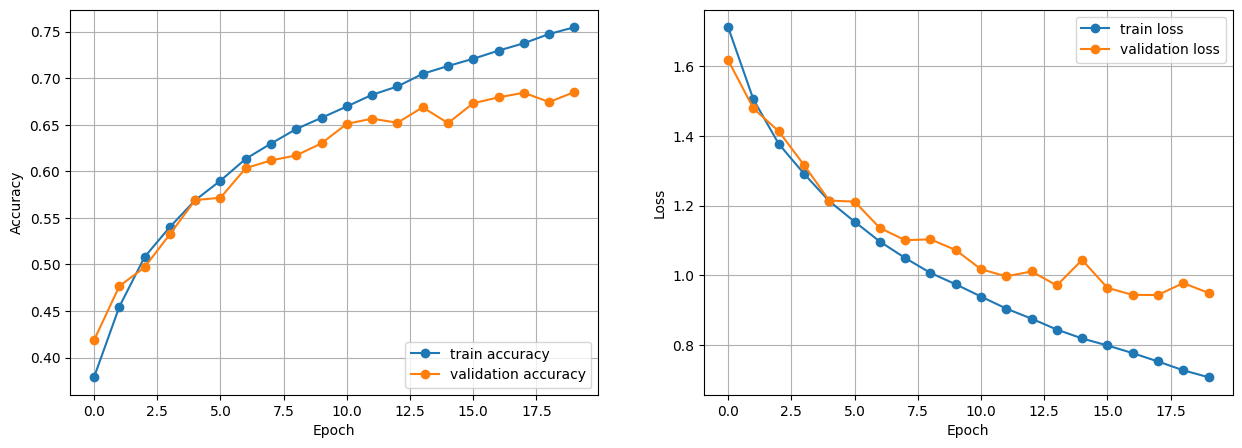

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**With Out Applying L1 and L2 legulizer the RMSProp also didn't provide me a good result. The only good results i have found out is by applkying adam optimizers in the dataset. I have tried to tune the models parameters as good as i can for RMSProp but it didn't provide me a good result and also out model is overfitting. So it is the best result i have found by applying RMSProp in this Dataset **

**Model Compilation With SGD Optimizer and Without Applying L1 and L2**

In [ ]:
model3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 32)        

In [ ]:
sgd = SGD(
    learning_rate=0.001,  # Adjust the learning rate
    momentum=0.9,         # Adjust the momentum value
    nesterov=True,
    decay=1e-6
)

model3.compile(
    optimizer=sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True)

h3 = model3.fit(
    x=X_train,
    y=Y_train,
    epochs=30,            # Increase the number of epochs if necessary
    validation_split=0.3,
    batch_size=128,
    callbacks=[cb]
)

Epoch 1/30
274/274 [==============================] - 175s 637ms/step - loss: 1.4784 - accuracy: 0.4648 - val_loss: 1.4789 - val_accuracy: 0.4603
Epoch 2/30
274/274 [==============================] - 169s 618ms/step - loss: 1.4558 - accuracy: 0.4717 - val_loss: 1.4745 - val_accuracy: 0.4685
Epoch 3/30
274/274 [==============================] - 171s 624ms/step - loss: 1.4335 - accuracy: 0.4841 - val_loss: 1.4574 - val_accuracy: 0.4729
Epoch 4/30
274/274 [==============================] - 168s 615ms/step - loss: 1.4130 - accuracy: 0.4884 - val_loss: 1.4318 - val_accuracy: 0.4858
Epoch 5/30
274/274 [==============================] - 169s 616ms/step - loss: 1.3929 - accuracy: 0.4994 - val_loss: 1.4059 - val_accuracy: 0.4940
Epoch 6/30
274/274 [==============================] - 169s 619ms/step - loss: 1.3739 - accuracy: 0.5049 - val_loss: 1.3971 - val_accuracy: 0.4977
Epoch 7/30
274/274 [==============================] - 163s 596ms/step - loss: 1.3555 - accuracy: 0.5134 - val_loss: 1.3900 -

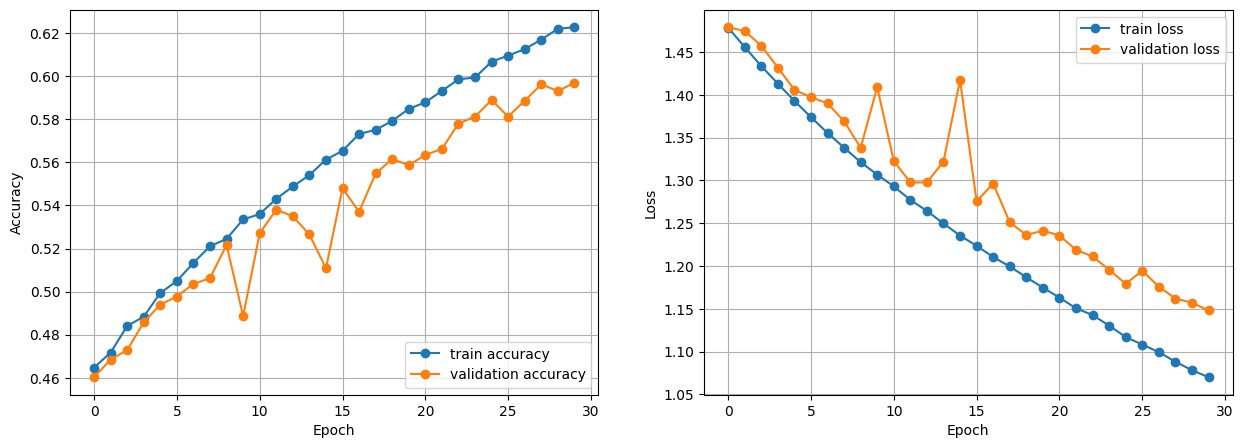

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**SGD doesn't Provide me good accuracy at all i have tried to tune the model as much as i can and i have also tried to utilize many parameters i can and also i have tried to reduce the overfitting. But unfortunately i didn't got good accuracy results by Applying SGD Optimizer. We can see that the model is overfitted. And It is not a good Optimizer for this dataset i have found out. I have also tried to tune the parameters as good as i can. But i got more bad results than now. And SGD needs more epoch than other optimizers, I have found out that.**

**Model Compilation With Adam Optimizer and Applying L1/L2 Legulizer**




In [ ]:


modeladwithl2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L2 regularization
    layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu', kernel_regularizer=l2(0.02)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),

    ## output layer
    layers.Dense(10, activation='softmax')
])
modeladwithl2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 32)        

In [ ]:
modeladwithl2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = modeladwithl2.fit(x=X_train, y=Y_train,
              epochs=10,
              validation_split=0.2,
              batch_size=128,
              callbacks=[cb]
             )

Epoch 1/10
313/313 [==============================] - 172s 545ms/step - loss: 2.5290 - accuracy: 0.3265 - val_loss: 2.4463 - val_accuracy: 0.3318
Epoch 2/10
313/313 [==============================] - 171s 547ms/step - loss: 2.3711 - accuracy: 0.3455 - val_loss: 2.3365 - val_accuracy: 0.3461
Epoch 3/10
313/313 [==============================] - 170s 541ms/step - loss: 2.2732 - accuracy: 0.3621 - val_loss: 2.2336 - val_accuracy: 0.3651
Epoch 4/10
313/313 [==============================] - 171s 545ms/step - loss: 2.2044 - accuracy: 0.3697 - val_loss: 2.1884 - val_accuracy: 0.3784
Epoch 5/10
313/313 [==============================] - 171s 547ms/step - loss: 2.1435 - accuracy: 0.3878 - val_loss: 2.1283 - val_accuracy: 0.3897
Epoch 6/10
313/313 [==============================] - 170s 543ms/step - loss: 2.0949 - accuracy: 0.3996 - val_loss: 2.0700 - val_accuracy: 0.4079
Epoch 7/10
313/313 [==============================] - 169s 541ms/step - loss: 2.0464 - accuracy: 0.4143 - val_loss: 2.0330 -

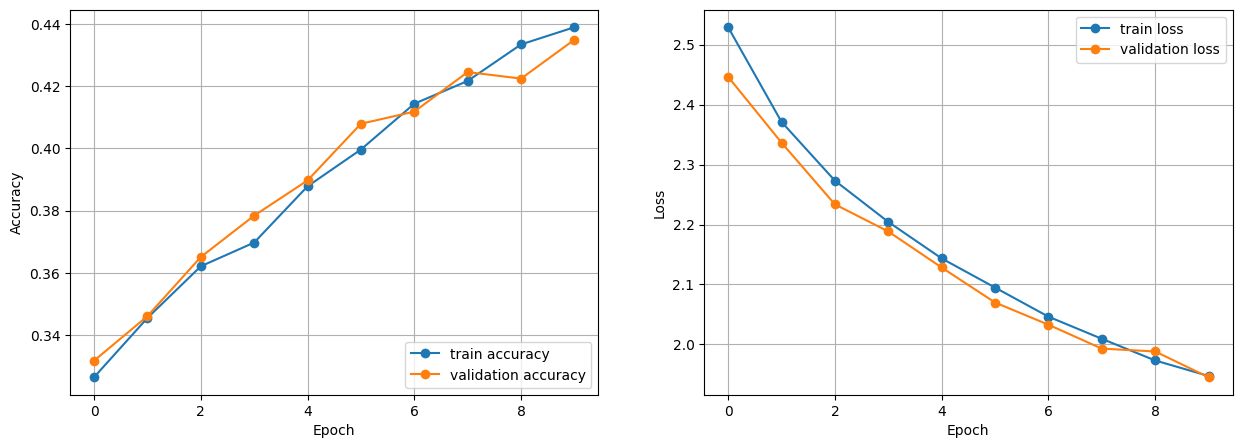

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

It is little bit surprising but i have seen that without l1/l2 regulizer the model with adam optimizer gives me more accurate results. But i have got the good results by applying l2 regulizer than l1 regulizer.

**Model Compilation With SGD Optimizer and Applying L1/L2 Legulizer**






In [ ]:
modelSGDwithl2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L1 and L2 regularization
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Add L1 regularization
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Add L1 regularization
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)),  # Add L1 regularization
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # Add L1 regularization

    ## output layer
    layers.Dense(10, activation='softmax')
])
modelSGDwithl2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 2, 2, 32)       

In [ ]:
sgd = SGD(
    learning_rate=0.001,  # Adjust the learning rate
    momentum=0.9,         # Adjust the momentum value
    nesterov=True,
    decay=1e-6
)

modelSGDwithl2.compile(
    optimizer=sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True)

h3 = modelSGDwithl2.fit(
    x=X_train,
    y=Y_train,
    epochs=30,            # Increase the number of epochs if necessary
    validation_split=0.3,
    batch_size=128,
    callbacks=[cb]
)

Epoch 1/30
274/274 [==============================] - 163s 594ms/step - loss: 2.5154 - accuracy: 0.1429 - val_loss: 2.5058 - val_accuracy: 0.1659
Epoch 2/30
274/274 [==============================] - 165s 602ms/step - loss: 2.4897 - accuracy: 0.1856 - val_loss: 2.4647 - val_accuracy: 0.2006
Epoch 3/30
274/274 [==============================] - 165s 601ms/step - loss: 2.4012 - accuracy: 0.2126 - val_loss: 2.3161 - val_accuracy: 0.2268
Epoch 4/30
274/274 [==============================] - 159s 582ms/step - loss: 2.2513 - accuracy: 0.2513 - val_loss: 2.2141 - val_accuracy: 0.2719
Epoch 5/30
274/274 [==============================] - 159s 581ms/step - loss: 2.1766 - accuracy: 0.2853 - val_loss: 2.1478 - val_accuracy: 0.3040
Epoch 6/30
274/274 [==============================] - 166s 606ms/step - loss: 2.1108 - accuracy: 0.3134 - val_loss: 2.0810 - val_accuracy: 0.3247
Epoch 7/30
274/274 [==============================] - 160s 585ms/step - loss: 2.0418 - accuracy: 0.3394 - val_loss: 2.0143 -

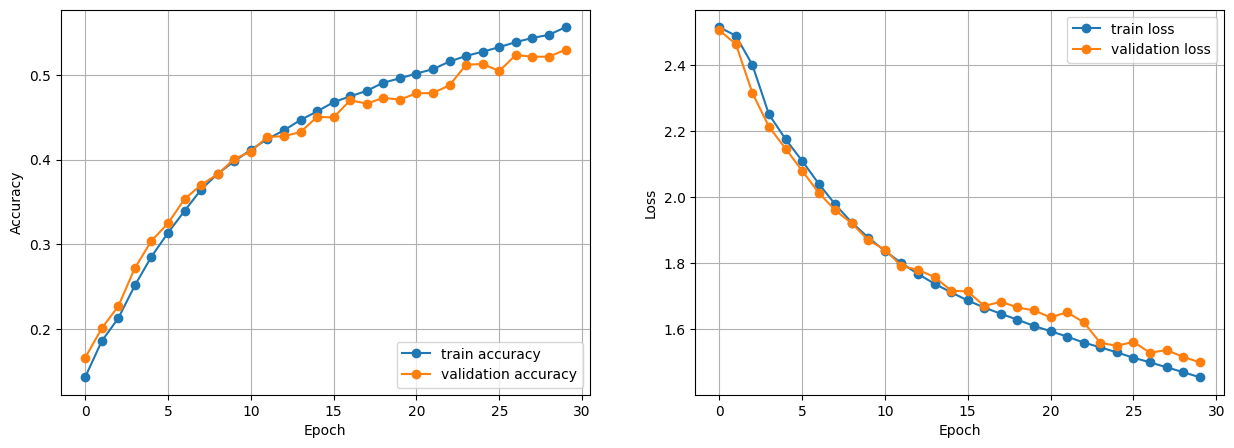

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**SGD need more epoch than other Optimizer to actually train the model and get a Good Results. After Applying l2 regulizer i actually get a good result than previously not applying the l2 regulizer. But L1 doesn't provide a good a result. By applying the L2 regulizer i have seen that it prevents the model from overfitting.**

**Model Compilation With RMSProp Optimizer and Applying L1/L2 Legulizer**

In [ ]:
modelRMSpropwithl2 = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),


    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),


    layers.Dense(10, activation='softmax')
])
modelRMSpropwithl2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 2, 2, 32)       

In [ ]:
modelRMSpropwithl2.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001,momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping_cb = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

h4 = modelRMSpropwithl2.fit(
    x=X_train,
    y=Y_train,
    epochs=20,
    validation_split=0.3,
    batch_size=64,
    callbacks=[early_stopping_cb, reduce_lr_cb]
)

Epoch 1/20
547/547 [==============================] - 167s 305ms/step - loss: 1.4333 - accuracy: 0.5334 - val_loss: 1.4709 - val_accuracy: 0.5203 - lr: 1.0000e-04
Epoch 2/20
547/547 [==============================] - 150s 275ms/step - loss: 1.3673 - accuracy: 0.5614 - val_loss: 1.4171 - val_accuracy: 0.5532 - lr: 1.0000e-04
Epoch 3/20
547/547 [==============================] - 158s 288ms/step - loss: 1.3185 - accuracy: 0.5815 - val_loss: 1.3450 - val_accuracy: 0.5731 - lr: 1.0000e-04
Epoch 4/20
547/547 [==============================] - 158s 289ms/step - loss: 1.2793 - accuracy: 0.5986 - val_loss: 1.2972 - val_accuracy: 0.5945 - lr: 1.0000e-04
Epoch 5/20
547/547 [==============================] - 150s 274ms/step - loss: 1.2375 - accuracy: 0.6158 - val_loss: 1.2770 - val_accuracy: 0.5977 - lr: 1.0000e-04
Epoch 6/20
547/547 [==============================] - 148s 270ms/step - loss: 1.2056 - accuracy: 0.6267 - val_loss: 1.2274 - val_accuracy: 0.6255 - lr: 1.0000e-04
Epoch 7/20
547/547 [==

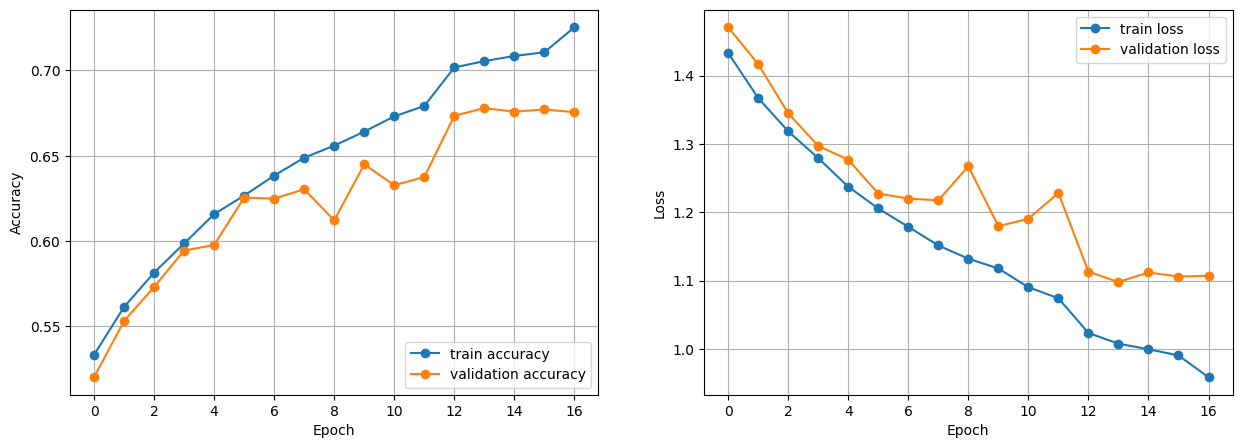

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

By Applying the RMSProp Optimizer i actually didn't get a good Result from the Model. I have tried to increase the model accuracy and overfitting by Increasing the Batchb Size and also by increasing the kernel size. I also tried decreasing both of them and applying various types of other  parameters and also tuning them but i didn't get the good result. As we can see that the model is Overfitting.

**WithOut Data Preprocessing and Applying Adam Optimizer**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.2, batch_size=64)
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)

h = model.fit(x=X_train, y=Y_train,
              epochs=17,
              validation_split=0.2,
              batch_size=64,
              callbacks=[cb]
             )

Epoch 1/17
625/625 [==============================] - 161s 257ms/step - loss: 2.4409 - accuracy: 0.1630 - val_loss: 2.1393 - val_accuracy: 0.2040
Epoch 2/17
625/625 [==============================] - 157s 251ms/step - loss: 2.0598 - accuracy: 0.2190 - val_loss: 2.0021 - val_accuracy: 0.2352
Epoch 3/17
625/625 [==============================] - 158s 252ms/step - loss: 1.9271 - accuracy: 0.2829 - val_loss: 1.8509 - val_accuracy: 0.3044
Epoch 4/17
625/625 [==============================] - 158s 253ms/step - loss: 1.7627 - accuracy: 0.3368 - val_loss: 1.7187 - val_accuracy: 0.3542
Epoch 5/17
625/625 [==============================] - 156s 250ms/step - loss: 1.6136 - accuracy: 0.4072 - val_loss: 1.5639 - val_accuracy: 0.4237
Epoch 6/17
625/625 [==============================] - 156s 250ms/step - loss: 1.5049 - accuracy: 0.4477 - val_loss: 1.5116 - val_accuracy: 0.4562
Epoch 7/17
625/625 [==============================] - 156s 250ms/step - loss: 1.4450 - accuracy: 0.4716 - val_loss: 1.4500 -

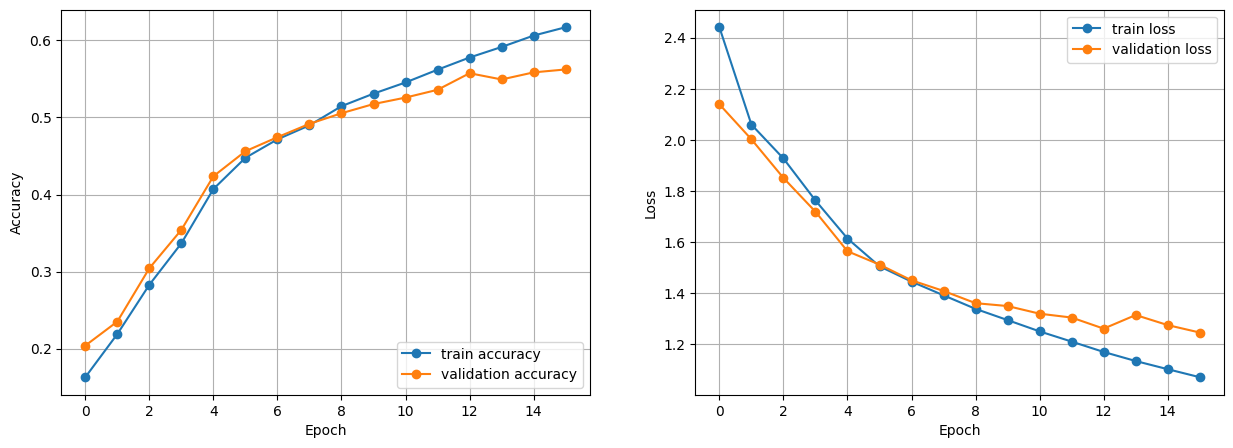

In [ ]:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
  plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend(loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(h.history['loss'], 'o-', label='train loss')
  plt.plot(h.history['val_loss'], 'o-', label='validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend(loc='upper right')

  plt.show()

**WithOut Data Preprocessing and Applying RMSProp Optimizer**

In [ ]:
model2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 2, 2, 32)       

In [ ]:
model2.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001,momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split=0.2, batch_size=64)
early_stopping_cb = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

hmodel2 = model2.fit(
    x=X_train,
    y=Y_train,
    epochs=20,  # Increase the number of epochs if necessary
    validation_split=0.3,
    batch_size=64,
    callbacks=[early_stopping_cb, reduce_lr_cb]  # Add the ReduceLROnPlateau callback
)


Epoch 1/20
547/547 [==============================] - 79s 142ms/step - loss: 2.3581 - accuracy: 0.2475 - val_loss: 1.7694 - val_accuracy: 0.3423 - lr: 1.0000e-04
Epoch 2/20
547/547 [==============================] - 79s 145ms/step - loss: 1.6952 - accuracy: 0.3780 - val_loss: 1.6627 - val_accuracy: 0.3925 - lr: 1.0000e-04
Epoch 3/20
547/547 [==============================] - 79s 145ms/step - loss: 1.5356 - accuracy: 0.4405 - val_loss: 1.5011 - val_accuracy: 0.4619 - lr: 1.0000e-04
Epoch 4/20
547/547 [==============================] - 79s 144ms/step - loss: 1.4327 - accuracy: 0.4790 - val_loss: 1.4546 - val_accuracy: 0.4821 - lr: 1.0000e-04
Epoch 5/20
547/547 [==============================] - 80s 147ms/step - loss: 1.3500 - accuracy: 0.5131 - val_loss: 1.3615 - val_accuracy: 0.5099 - lr: 1.0000e-04
Epoch 6/20
547/547 [==============================] - 79s 145ms/step - loss: 1.2882 - accuracy: 0.5391 - val_loss: 1.3843 - val_accuracy: 0.5147 - lr: 1.0000e-04
Epoch 7/20
547/547 [========

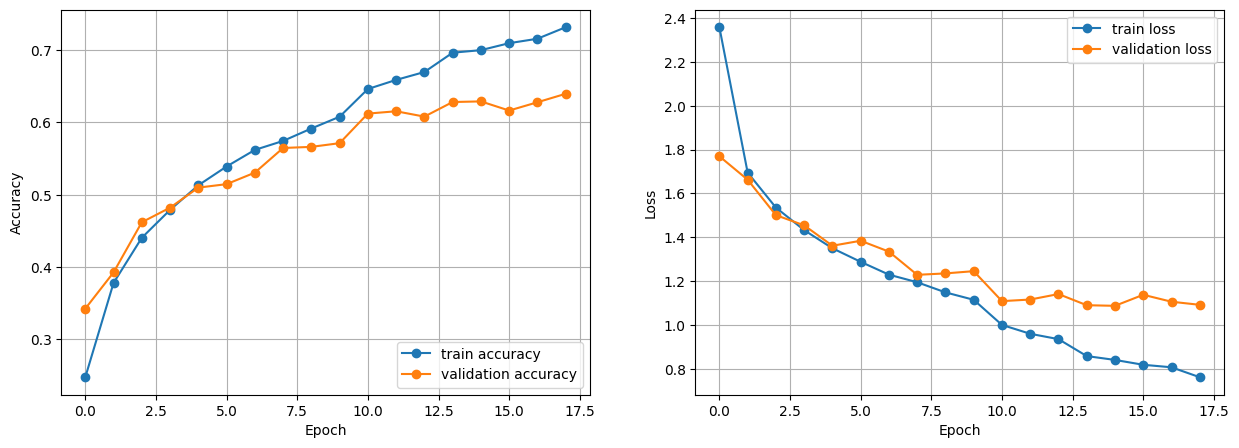

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hmodel2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(hmodel2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(hmodel2.history['loss'], 'o-', label='train loss')
plt.plot(hmodel2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**WithOut Data Preprocessing and Applying SGD Optimizer**

In [ ]:
modelSGD3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),

    ## hidden layers
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
modelSGD3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 2, 2, 32)       

In [ ]:
sgd = SGD(
    learning_rate=0.001,  # Adjust the learning rate
    momentum=0.9,         # Adjust the momentum value
    nesterov=True,
    decay=1e-6
)

modelSGD3.compile(
    optimizer=sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True)

hwithoutpreprop = modelSGD3.fit(
    x=X_train,
    y=Y_train,
    epochs=30,            # Increase the number of epochs if necessary
    validation_split=0.3,
    batch_size=128,
    callbacks=[cb]
)

Epoch 1/30
274/274 [==============================] - 153s 556ms/step - loss: 3.3819 - accuracy: 0.1010 - val_loss: 2.3036 - val_accuracy: 0.1089
Epoch 2/30
274/274 [==============================] - 151s 553ms/step - loss: 2.3020 - accuracy: 0.1115 - val_loss: 2.3024 - val_accuracy: 0.1209
Epoch 3/30
274/274 [==============================] - 152s 555ms/step - loss: 2.2685 - accuracy: 0.1435 - val_loss: 2.2101 - val_accuracy: 0.1658
Epoch 4/30
274/274 [==============================] - 152s 556ms/step - loss: 2.1558 - accuracy: 0.1872 - val_loss: 2.0911 - val_accuracy: 0.2111
Epoch 5/30
274/274 [==============================] - 152s 556ms/step - loss: 2.0294 - accuracy: 0.2284 - val_loss: 2.0585 - val_accuracy: 0.2315
Epoch 6/30
274/274 [==============================] - 146s 533ms/step - loss: 1.9238 - accuracy: 0.2689 - val_loss: 1.9223 - val_accuracy: 0.2803
Epoch 7/30
274/274 [==============================] - 152s 554ms/step - loss: 1.8457 - accuracy: 0.3118 - val_loss: 1.8108 -

**WithOut Data Preprocessing We didn't get good Results from our Model. And Data Preprocessing Plays a significant role for providing a better accurecy of the ModeL. Without Data Preprocessing we have seen that the loss Fucntion is also increased. And also we saw that the Model is Overfitting. Data Preprocessing helps to improve the Quality of the Data and allows the models to learn more effectively and accurately. Most Important term properly processed data reduces the chances of the model overfitting to noise or irrelevant patterns in the data and ensures that the model generalizes well to new, unseen data. So with Data Preproccing we have seen that our model is not that mush overfitting.And Data preprocessing techniques like scaling and normalization ensure that all features are on a comparable scale, preventing some features from dominating others and causing biased model results. So I can say that Data Preproccing Plays a Significant Role for Improving the Model Accuracy and overall Quality**